# Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service). You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Complete all of the tasks. 
- Make sure your code is readable, organised, and commented appropriately.

---

## Task 1 - Code review

This task is to write a code review, *not* to write python code to solve the problem brief.  

A colleague has been asked to write a program to calculate a root of a continuous function using the **bisection method** as described in the following brief:

---

### Brief

The bisection method is a simple numerical technique to find a root of a continuous function in an interval where this function changes sign. According to [Intermediate value theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem), the continuous function $f=f(x)$ has at least one root in the interval $[a, b]$, if $f(a)f(b) \leq 0$. Utilising this fact, the following 3-step algorithm will find the root of such function within a desired accuracy:

1. Calculate the midpoint $c = (a+b)/2$ and evaluate the function at this point $f(c)$.
2. If $ (b-a)/2 < \epsilon_1 $ or $|f(c)| < \epsilon_2 $, then return $c$ as the root and stop. 
3. Otherwise, depending on the sign of $f(c)$ replace either $a$ or $b$ with $c$, such that $f(a)f(b) < 0$ for the new $a$ and $b$. Then go to step 1.

The criteria introduced in step 2 ensures the difference between the answer and the real root to be less than $\epsilon_1$ or _that_ the function value at the answer is smaller than $\epsilon_2$ (so it can be considered an approximate root). You are supposed to write a function that takes $a$, $b$, $\epsilon_1$ and $\epsilon_2$ as inputs and returns a root using the bisection method. 

Note that the bisection method does not guarantee or detect a change of sign in an interval if the two end points have similar signs. Hence, your program should first search for some subinterval where the function changes sign. This can be achieved by halving the intervals consecutively until in one of the smaller subinterval the function changes sign. If no such an interval is found while the size of the smallest interval is still bigger than $\epsilon_1$, the function returns 'None' and prints out "failed to find a root". 

Test your code for a continuous function on a given interval.  

### Your task:

You have been asked to write a review of their code. Here is the code they wrote:

In [1]:
from math import *

def root_finder(a,b,eps1,eps2):
# First find an interval where the function changes sign
    if ff(a)*ff(b)>0:
        findinterval = 0
    else:
            findinterval = 1
        
    n = 2;
    while (findinterval == 0) and ( (b-a)/n > eps1):
        subintervals =[a + i*(b-a)/n for i in range(n+1)]
        print(subintervals)
        n *= 2
        for j in range(n):
            i = j + 1
            if (ff(subintervals[i])<0):
                a = subintervals[i-1]
                b = subintervals[i]
                findinterval = 1.0
                break
   
        
    if (findinterval == 0):
        print("failed to find a root")
    else:
        # implement the bisection method
        if (abs(ff(a))<eps2): # check if a or b are roots:
            return a
        if (abs(ff(b))<eps2):
            # print(b)
            return b
        while ((b-a) > eps1): 
            c = (a+b)/2
            print(c)
            if (ff(c)<eps2):
                return c
            else:
                if ff(b)*ff(c)>0:
                    b = c
                else:
                        a = c
        return c
    
                                
def ff(x):
    y = x**2-5*x+4 
    # y = sin(2*pi*x)
    return y
    
 # Test for x^2-5x+4 from 0 to 2 
my_root = root_finder(0,2,.0001,0.00001)
print('the root is', my_root)

1.0
the root is 1.0


You should write your review here. 
Things you could choose to discuss:
- Code structure 
- Code style
- Does it answer the brief?
- Does it work? If not_,_ could it be fixed?
- Can you explain what it does?

Keep your answer relatively brief (approx. 500 words).

### Answer:

## Code Strcture:

- ***Datatypes:***
`findinterval` acts like a flag (Boolean) for while loop. So, it could be defined as Boolean datatype rather than integer. Boolean takes 24 bytes while interger is 28 bytes. Although the difference in size is not signifact, the code would also become more readable by changing the datatype to boolean. Also, assiging floating value to `findinterval` is absolutely unnecessary.

- ***else after return statement in won't be executed:***
In the code block below, the `else` after return won't be executed if condition in `if` statement above is satisfied. So `else` could be removed.
```
if (ff(c)<eps2):
                return c
            else:
                if ff(b)*ff(c)>0:
                    b = c
                else:
                        a = c
``` 

- ***Code could have helper functions:***
`root_finder` function finds a root if it is any root within a given interval. This function can use another helper function to find the interval that sign of the fucntion changes ( In the cases that `ff(a)*ff(b) > 0` ) and return an interval where function change sign. This would make the `root_finder` functino more readable and easier to debug. 

- ***Too many if else branches:***
There are too many branches. for example:
```
# implement the bisection method
        if (abs(ff(a))<eps2): # check if a or b are roots:
            return a
        if (abs(ff(b))<eps2):
            # print(b)
            return b
        while ((b-a) > eps1): 
            c = (a+b)/2
            print(c)
            if (ff(c)<eps2):
                return c
            else:
                if ff(b)*ff(c)>0:
                    b = c
                else:
                        a = c
        return c
```
can be replace with a function that implement bisection method and return the root.

- ***Defining extra variables***:
The code could have been written with less number of varibables and hence less memory comsumption. For instance, definig variable `i = j + 1` in the for loop is unnecesaary. 

## Code Style:

The code style comments are based on the Google Python Style Guide and PEP 8 -- Style Guide for Python Code.

- ***Missing docstrings for module and functions and unnecessary comments:***

according to PEP, all modules and public methods(functions in our program) should have docstring. Module and the function should have docstring to describe what they do. The name of the function does not imply what the actually do. e.g. `ff` name does not say anything about calculating a quadratic function value. Therefore, dosctring could be used to explain how the functions work and what are their keyword argument, return datatypes.
Moreover, the code contains commented lines which are not used in the code. This would make the code less readable.

- ***Wildcard import math, unsed import from math module:***

According to PEP, wildcard import should be avoided as as it is not clear which names are added to the namespace. Moreover, many other modules are added to the name space that are not used. In the code about `from math import *` import unsed names (functions) that are not used in the code. Moreover, the code does not even use any module from `math` library.



- ***Unnecessary semicolon and parathesis:***

Python language doesn't require after defining variables. However, if one chooses to use semicolon, they should be consistent.`n = 2;`.Also, the paranthesis after *if* statement can be omited. 

- ***Unnecessary indentation:***

the line 
```
                else:
                        a = c
```
and 
```
    else:
            findinterval = 1
```
has extra indentation. 8 number of spaces is required, however, 12 spaces in used in the code.

- ***Spaces:***

It is recommended to use one space after comma, around comparison, after assignment. Also, there is an extra space after bracket *( (b-a)/n > eps1)* which should be deleted.

- ***Naming:***

function names could be more descriptive. `ff` does not imply the functinality of the function. It is recommended to use snake_case naming style for variables and function.

- ***Used built-in function:***

Python has a built-in function for power of a number *pow* which would make the code more readable than using **.






## Does it answer the brief:
The code follows the instruction in the brief, however, the implmentation of the code needs some fixes. However, in general, it does answer the brief. albeit, it gives wrong answer for some intervals and also gives error on interval with no sign change.

## Does it work? if not_,_ could it be fixed? :

Not for any given interval. The code returns true root if intervals are chosen between $(-\infty,4)$. If we choose the interval $(0,5)$ for example, we get a wrong root ($1.25$). 

The code gives *IndexError* if we choose an inerval such as $(0,8)$. This is because the `ff(subintervals[i])<0` inside for loop is not satisfied and the value of `j` keeps increasing until it becomes larger than lenght of `subinterval` array.

To fix the code: we need to consider two scenarios: 
- **Function ff changes sign in the given interval (findinterval == 1)**:
This could be fixed by changing `if (ff(c)<eps2)` to `if (abs(ff(c))<eps2)` as the value of `ff(c)` could be negative. The current code return `c` as the root when `ff(c)` is negative which satisfies the `if` condition.

- **Function ff does not change sign in the given inerval**: To fix this, we need to change the part that looks for an interval the functino `ff` change sign. So the code block below:
```
        n *= 2
        for j in range(n):
            i = j + 1
            if (ff(subintervals[i])<0):
                a = subintervals[i-1]
                b = subintervals[i]
                findinterval = 1.0
                break
```

could be fix by changing the `range` values and `subintervals` indices. The code below is the fixed version.
``` 
for j in range(len(subintervals) - 1):
            i = j + 1
            if ff(subintervals[j]) * ff(subintervals[j + 1]) <0:
                a = subintervals[j]
                b = subintervals[j + 1]
                findinterval = 1.0
                break
```

The code cell below is the correct version of the code (with comments on the changes)

## What does the code do:
To answer to this qestion, I have commented the (original) code in the code cell below:

In [2]:
from math import * # Import math library (It is not used in the code)

def root_finder(a,b,eps1,eps2):
# First find an interval where the function changes sign
    if ff(a)*ff(b)>0: # If sign is not changed within the boundary of interval
        findinterval = 0 # Set flag findinterval to 0
    else: # If sign changes within the boundary of interval
            findinterval = 1 # Set findinterval to 1
        
    n = 2; # Initial value of n for dividing the interval by
    while (findinterval == 0) and ( (b-a)/n > eps1): # Run a loop as long as interval is not found and it is greater thatn eps1
        subintervals =[a + i*(b-a)/n for i in range(n+1)] # Create subintervals by diving the oroginal interval by n
        print(subintervals) # Printing subintervals 
        n *= 2 # Mutiply n by 2, as each time we need to divide interval into two intervals
        for j in range(n): # For loop to check whether sign of ff changes within the boundary of subintervals
            i = j + 1 # Define variable i which is j + 1 ( Unneccesary )
            if (ff(subintervals[i])<0): # Check whether the function ff is negative at the upper bound of subinterval
                a = subintervals[i-1] # Reassign value of a as the lower bound of subinterval 
                b = subintervals[i] # Reassign the value of b as the upper bound of subinterval
                findinterval = 1.0 # Set the findinterval flag to 1 , as an interval in found that ff changes sign
                break # get out of for loop and carry on to find the root within this interval
   
        
    if (findinterval == 0): # If no interval in found
        print("failed to find a root") # Print "failed to find a root"
    else: # Otherwise, means an interval is found
        # implement the bisection method
        if (abs(ff(a))<eps2): # check if a root:
            return a # If a is very close to the root, then return a
        if (abs(ff(b))<eps2): # check if b is root
            # print(b)
            return b # return b as the root
        while ((b-a) > eps1): # Otherwise, keep halving the interval until root is find
            c = (a+b)/2 # define variable c as the mid-point if the interval (a,b)
            print(c)
            if (ff(c)<eps2): # Check whether c is the root (this is wrong, the corrected version is the code cell belwo)
                return c # return c as the root 
            else: # Otherwise, chech how the sign of ff changes within (c,b) and (a,c)
                if ff(b)*ff(c)>0: # If ff has the same sign within (c,b), then new upper bound b becomes c
                    b = c # set upper bound of interval to c
                else: # otherwise means ff does not change sign within (a,c), then new lower bound a becomes c
                        a = c # set new lower bound to c
        return c # return c as the root
    

# Defining function ff 
def ff(x):
    y = x**2-5*x+4 # Equation of function ff
    # y = sin(2*pi*x)
    return y # return value of the eqation given x 
    
 # Test for x^2-5x+4 from 0 to 2 
my_root = root_finder(0,2,.0001,0.00001) # call function root_finder to find root of x**2-5*x+4
print('the root is', my_root) # Print value of root if it exists, otherwise it is None

1.0
the root is 1.0


### Working Version of the Code

In [3]:
# Working version of the code above
def root_finder(a,b,eps1,eps2):
# First find an interval where the function changes sign
    if ff(a)*ff(b)>0:
        findinterval = 0
    else:
            findinterval = 1
        
    n = 2;
    while (findinterval == 0) and ( (b-a)/n > eps1):
        subintervals =[a + i*(b-a)/n for i in range(n+1)]
        n *= 2 
        for j in range(len(subintervals) - 1): # Original version : range(n) 
            i = j + 1
            if ff(subintervals[j]) * ff(subintervals[j + 1]) <0:# # Original version : if (ff(subintervals[i])<0): 
                a = subintervals[j] # Original version : a = subintervals[i-1]
                b = subintervals[j + 1] # Original version: b = subintervals[i]
                findinterval = 1.0
                break
   
        
    if (findinterval == 0):
        print("failed to find a root")
    else:
        # implement the bisection method
        if (abs(ff(a))<eps2): # check if a or b are roots:
            return a
        if (abs(ff(b))<eps2):
            return b
        while ((b-a) > eps1): 
            c = (a+b)/2
            if (abs(ff(c))<eps2): # Original version: (ff(c)<eps2)
                return c
            else:
                if ff(b)*ff(c)>0:
                    b = c
                else:
                    a = c
        return c
    
                                
def ff(x):
    y = x**2-5*x+4 
    # y = sin(2*pi*x)
    return y

---

## Task 2 - Traffic Modelling

### Task 2a - update rule

For this task, you will work on a model of road traffic using discretised cells, which is an example of a larger class of models in computer science called [cellular automaton](https://en.wikipedia.org/wiki/Cellular_automaton). Imagine a road that is divided into a number of cells which can contain only one car. For now, let's assume this road is one-way from left to right. We also discretise time into steps. At each step a car moves to its adjacent right cell if it is empty; otherwise, it stays where it is (see the figure below). 

![](schematicroad.png)

We use a periodic boundary condition such that a car that moves off the right-most cell enters into the left-most cell as shown by the red arrow in the schematic above (if you like you can think of this problem as representing a roundabout rather than a straight section of a road).

You should write a function that finds the position of cars in the next step given their positions in the current step. To do this systematically, we can define the numpy array `R[i,t]` that is 0 if there are no cars in the "`i`" section of the road, and 1 if a car is present at that section for the time step "`t`". "`i`" varies from 1 to $N$ (the total number of cells), and "`t`" varies from 0 to $T$. The new value `R[i,t+1]` depends on its old value at time $t$ (i.e. `R[i,t]`), and also on the old values of the neighbours (`R[i-1,t]` and `R[i+1,t]`). You might think about how you would fill out the tables below (on paper - no need to edit the table in your file) to use them to get an explicit form of the update rules (note we use notation here that `R[i,t]` is the same as $R^t(i)$ below):

![](tables.png)


To test your update function you can use the following example of a road with 9 cells. If we label the cars by their initial cell position, this demonstrates how they move in the next three steps. 

![](roadexample.png)

The array `R`, for this example, becomes 

$$
\left(\begin{array}{cccc}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 1\\
1 & 1 & 1 & 0\\
1 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 0\\
1 & 1 & 0 & 1\\
\end{array}\right)
$$

Throughout this project, let's denote the total number of cells by $N$, the total number of cars by $M$ and the final time step by $T$.

For the first part of this task you should write code to perform each of the following sub-tasks or markdown text to answer any discussion questions:

1) Write a function **`updateR(R[i,t])`**, which takes **`R[i,t]`** at the current time step as its argument and returns the updated value **`R[i,t+1]`** for the next step. Make sure you properly implement the periodic boundary condition in this function. Test your function with the example above. Your function should work for any choice of positive integer $N>3$.

2) Numbering your cells from $1$ to $N=100$, put the cars initially (at $t=0$) in those cells with a prime number index and also the cells in $(40,55]$. Calculate and print out the position of the cars at the final time $T = 400$.

3) Plot the position of the cars from problem 2) in the following three time intervals: $t=[0, 20]$, $[300, 320]$ and $[380, 400]$. Discuss whether you think that the traffic reaches some steady state by the end of the simulation. What is the average velocity of all the cars at the end of the simulation? Note you can either point markers in `plot`, or use the plotting function `imshow` to create a checkerboard-like plot.

In [4]:
def find_primes(lower=1, upper=100):
    """Function the returns a list of prime numbers within a given interval [lower,upper].
        
        Example:
            find_primes(1,5) return [2,3,5]
    """
    primes = [] # Initilaise primes list
    # For loop to find prime number checking their remainder to the numbers smaller
    for num in range(lower, upper + 1):
        # prime numbers are greater than 1
        if num > 1:
            # For loop from 2 to the number and check whether the remainder is zero 
            for i in range(2, num):
                # If remainder is zero -> number is NOT prime
                if (num % i) == 0:
                    break
            else:
                # If the number is not dividable by any smaller value -> prime
                primes.append(num)
    return primes


1) Write a function **`updateR(R[i,t])`**, which takes **`R[i,t]`** at the current time step as its argument and returns the updated value **`R[i,t+1]`** for the next step. Make sure you properly implement the periodic boundary condition in this function. Test your function with the example above. Your function should work for any choice of positive integer $N>3$.

In [5]:
import numpy as np # Import numpy library
def updateR(r):
    """Function takes R[i,t] and return R[i, t+1]. 
    Takes input a vector size N and return a vetor size N"""
    front_cells = np.roll(r, -1, axis=0) # Get the front cell status (0 or 1)
    behind_cells = np.roll(r, 1, axis=0) # Get the behind cell status (0 0r 1)
    negated_current_cells = 1 - r # Negate the value of current cell
    
    # Get next cell state using logic gate (bitwise) operations (r = A, front_cells = B, behind_cells = C)
    # Then current cell can be calculated as y = AB + C(~A)
    next_state = r * front_cells + behind_cells*negated_current_cells # Use logic gate to get the next state
    
    return next_state

R_test = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,0],[0,1,0,1],[0,0,1,0],[1,1,0,1]])
# Test the output of updateR function. R[:,t] ?= R[:,t+1]
np.testing.assert_equal(updateR(R_test[:,0]), R_test[:,1])

2) Numbering your cells from $1$ to $N=100$, put the cars initially (at $t=0$) in those cells with a prime number index and also the cells in $(40,55]$. Calculate and print out the position of the cars at the final time $T = 400$.

In [6]:
def init_traffic(N=100, cars=None):
    """Return the initial state of road (R[:,0]) with given list of car positions on the road.
    Index of cars start from 1 to N"""
    # Set all cells to 0
    traffic = np.zeros(N)
    # Fill up cells with cars
    for i in range(N):
        # Check if cells contains car (car indices start from 1 to N)
        if i+1 in cars:
            traffic[i] = 1
    # Return the traffic as numpy int
    return traffic.astype(int)


def get_updated_traffic(T, initial_traffic, interval=None):
    """ Return current state of traffic at time T or within a given interval. If interval is given, a matrix of R
    within the time interval is returned, otherwise, the vector R[:,T] is returned. The function takes value of T as int,
    intial_traffic as vector of size N, and interval [a,b]"""
    
    current_traffic = initial_traffic # Set current_traffic to intial_traffic
    traffic_state = [] # store the matrix R[:,t0:T]
    
    # Check if an interval is given
    if interval is not None:
        # Find the traffic state just before the interval
        for _ in range(interval[0]):
            current_traffic = updateR(current_traffic)
        # Keep updating traffic from lower bound of interval to upper bound and string the states in traffic_state
        for _ in interval:
            current_traffic = updateR(current_traffic)
            traffic_state.append(current_traffic) 
        return np.transpose(traffic_state).astype(int)
    
    # Get the traffic at given time T
    for _ in range(T):
        current_traffic = updateR(current_traffic)
    return np.array(current_traffic).astype(int)


N = 100 # Number of cells 
primes_cells = find_primes(1,N) # Get list of prime number between (1,N)
cars = set(primes_cells + list(range(41,56))) # Create list on car indices by adding prime numbers list and (40,55]
M = len(cars) # Number of cars
initial_traffic = init_traffic(N, cars) # Initialise the traffic with given car indices
print('Traffic at T=400:')
get_updated_traffic(400, initial_traffic) # Get the traffic status at T = 400

Traffic at T=400:


array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

3) Plot the position of the cars from problem 2) in the following three time intervals: $t=[0, 20]$, $[300, 320]$ and $[380, 400]$. Discuss whether you think that the traffic reaches some steady state by the end of the simulation. What is the average velocity of all the cars at the end of the simulation? Note you can either point markers in `plot`, or use the plotting function `imshow` to create a checkerboard-like plot.

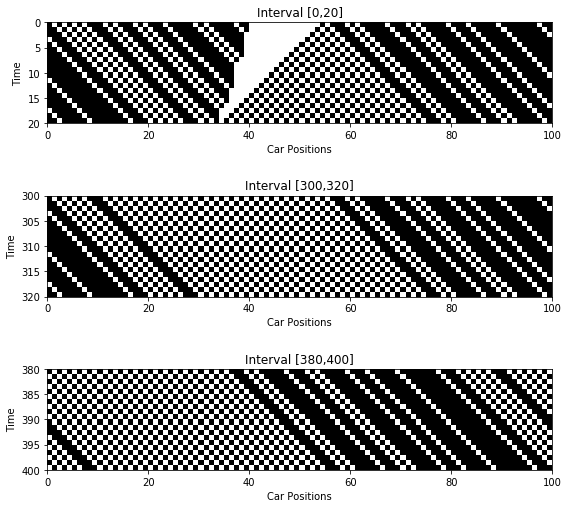

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

iterval = list(range(0,400))
R = get_updated_traffic(_, initial_traffic, iterval)

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(8,10))

ax1.set_title('Interval [0,20]')
i1 = ax1.imshow(R[:,0:20].T, cmap=cm.gray, aspect=1, extent=[0,100,20,0])
ax1.set_ylabel('Time')
ax1.set_xlabel('Car Positions')

ax2.set_title('Interval [300,320]')
i2 = ax2.imshow(R[:,300:320].T, cmap=cm.gray, aspect=1, extent=[0,100,320,300])
ax2.set_ylabel('Time')
ax2.set_xlabel('Car Positions')

ax3.set_title('Interval [380,400]')
i3 = ax3.imshow(R[:,380:400].T, cmap=cm.gray, aspect=1, extent=[0,100,400,380])
ax3.set_ylabel('Time')
ax3.set_xlabel('Car Positions')

fig.tight_layout()
fig.subplots_adjust(top=0.75)
plt.show()

---

Discuss whether you think that the traffic reaches some steady state by the end of the simulation. What is the average velocity of all the cars at the end of the simulation?

In [8]:
r_t399 = get_updated_traffic(399, initial_traffic, None) # Traffic at T = 399
r_t400 = get_updated_traffic(400, initial_traffic, None) # Traffic at T = 400
number_of_moves = np.count_nonzero(r_t400 - r_t399 == 1) # Get number of moves by finding forward moves
avg_speed = number_of_moves / M # Divide number of forward moves by number of cars
print('Average Speed at T:400: {}'.format(avg_speed))

Average Speed at T:400: 1.0


The traffic reached steady state and average speed of all cars is one. In other words, at each time step, all cars can move one cell forward.

### Task 2b - Trajectory of the cars and average velocity

Storing `R[i,t]` at each time step is unnecessarily memory-consuming. Moreover, it is hard to track individual cars through the zeros and ones of `R[i,t]`. Instead, it is more efficient for many purposes to store the trajectories of each car in an array, `Traj[car,t]`, where each row records the trajectory for a different car, with the value in each successive column recording the location at each successive time step. Our next purpose is to use this array to calculate the average velocities of each car. So it is now better not to use the periodic boundary condition immediately, but to store the value of $N+1$ for the car that moves off the last cell (similarly storing the value of $N+2$ instead of 2 etc). For instance, for the 9-cell road shown in the previous figure `Traj` is constructed as below:

$$
\left(\begin{array}{ccc}
1 & 2 & 3 & 3\\
4 & 4 & 4 & 5\\
5 & 5 & 6 & 7\\
6 & 7 & 8 & 9\\
9 & 9 & 10& 11\\
\end{array}\right)
$$

To derive `Traj[:,t+1]` from `Traj[:,t]`, we only need the current column of `R` and not the entire matrix `R[0:N,0:t+1]`. Hence, we are going to only keep the vector `r[0:N]`, which is the current state of the road with empty cells represented by 0 and cells with a car by 1 (i.e. `r=R[:,t]`). Now write a new funtion **`new_position(r,Traj)`** that takes the vector `r` and the current position vector `Traj[:,t]`, and returns the next column `Traj[:,t+1]`. 

Using `Traj[:,t+1]` and [modular arithmetic](https://en.wikipedia.org/wiki/Modular_arithmetic) you can update `r` more easily. To update `r` from the state at `t` to `t+1` you will need to: 

- start a new array for `r` at `t+1` by filling `r[:]` values as zeros initially
- take each element of `Traj[:,t+1]`
- find the remainder when you divide that element by $N$, call it `j`
- set `r[j-1]=1`.

(Note what is happening here - you are storing the cars in cells 1 up to N in array positions indexed 0 up to N-1).

Write another function **`new_updateR(Traj[:,t+1])`** that takes the trajectory at `t+1` and returns a new vector `r` without using any `if` statements using this procedure outlined above. (Note here the size of `r` is $N$ and the size of `Traj` is $M \times T$).

The speed of car `i` at time `t` can be readily calculated as **`Traj[i,t]-Traj[i,t-1]`**, which is either 0 or 1 cell per step. Write the function **`ave_vel(Traj,t)`** that takes the array of trajectories and the time step and returns the average velocity of all cars at time `t`.   

Using the functions you have written; **`new_position()`**, **`new_updateR()`** and **`ave_vel()`**, complete the following list of tasks:


1) Test your function **`new_position()`** by using the example above.

2) Put $M = 15$ cars in the first fifteen cells of a road that has $N = 50$ cells. Plot the average speed of all cars as a function of time up to $T=50$. How long does it take to reach a steady average speed?

3) Repeat question 2) for $M = 25$ and $M = 35$ and discuss the results. Is the final average speed the same for all $M$? Which is the largest value of $M$ for which you can reach the maximum average speed?

Now write a new funtion **`new_position(r,Traj)`** that takes the vector `r` and the current position vector `Traj[:,t]`, and returns the next column `Traj[:,t+1]`.
1) Test your function **`new_position()`** by using the example above.

In [9]:
def new_position(r, traj):
    """Returns new trajectories of cars. It takes currect traffic state (r) and currect trajectory (traj)"""
    N = len(r) # Store length of the road
    shifted_r = np.roll(r, -1, axis=0) # Shift to the left to get the next state of each cell
    diff = r - shifted_r # Find if the the front cell is empty 
    increment = np.take(diff, (traj-1) % N) # Get availability of front cell for values in trajectory (traj - 1)
    return np.array(traj + increment).astype(int) # Increment value of traj and return new traj

Traj_test = np.array([[1,2,3,3],[4,4,4,5],[5,5,6,7],[6,7,8,9],[9,9,10,11]])
R_test = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,0],[0,1,0,1],[0,0,1,0],[1,1,0,1]])

# Test whether function new_position return Traj_test[:,t+1] given R_test[:,t] and Traj_test[:,t]
np.testing.assert_equal(new_position(R_test[:,1], Traj_test[:,1]),Traj_test[:,2])
new_r = new_position(R_test[:,1], Traj_test[:,1])
print('updated position given R_test[:,1] and Traj_test[:,1]')
print(new_r)

updated position given R_test[:,1] and Traj_test[:,1]
[ 3  4  6  8 10]


Write another function **`new_updateR(Traj[:,t+1])`** that takes the trajectory at `t+1` and returns a new vector `r` without using any `if` statements using this procedure outlined above. (Note here the size of `r` is $N$ and the size of `Traj` is $M \times T$).

In [10]:
# As we need length of the road, we pass N as an argument to the function. To avoid any undefined error
def new_updateR(traj, N = 9):
    """Return traffic state at time t+1 given trajectory at t+1 and length of the road,
    Keyword arguments:
    traj -> trajectory vector at t+1
    N -> size of the road"""
    r = np.zeros(N) # Initialise road with zeros given the length N
    
    # Get remainder of Trajeectory by the length of the road N. This gives gives indices in range(0,N)
    remainder = traj % N # For every car at index j set values of r to 1
    for j in remainder:
        r[j-1] = 1
    return r.astype(int)
    
Traj_test = np.array([[1,2,3,3],[4,4,4,5],[5,5,6,7],[6,7,8,9],[9,9,10,11]])
R_test = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,0],[0,1,0,1],[0,0,1,0],[1,1,0,1]])

# Test whether function new_updateR return R[:,t+1] given Traj_test[:,t+1] and size of the road
np.testing.assert_equal(new_updateR(Traj_test[:,2], 9),R_test[:,2])


The speed of car `i` at time `t` can be readily calculated as **`Traj[i,t]-Traj[i,t-1]`**, which is either 0 or 1 cell per step. Write the function **`ave_vel(Traj,t)`** that takes the array of trajectories and the time step and returns the average velocity of all cars at time `t`. 

In [11]:
def ave_vel(Traj, T):
    """Function returns the average speed of each car given Trajectory matrix and time T.
    Keyword arguments:
    Traj -> Trajectory Matrix (MxT)
    T -> The time step"""
    diff = Traj[:,T-1]-Traj[:,T-2] # Get the different in Trajectory to find number of forward move for each car
    return np.mean(diff) # Return the average over all cars
  
Traj_test = np.array([[1,2,3,3],[4,4,4,5],[5,5,6,7],[6,7,8,9],[9,9,10,11]])
avg_t2 = ave_vel(Traj_test, 2)
print('Average speed of cars at T=2 is equal to: {}'.format(avg_t2)) 

Average speed of cars at T=2 is equal to: 0.4


In [12]:
# HELPER function which return the Matrix of R and Trajectory given initial traffic (R[:,0]) and Upper bound T
def build_traj(r0, upper_t):
    """Function return Matrices R and Traj from time 0 to upper_t.
    Keyword arguments:
    r0 -> Intial traffic or road status
    upper_t -> The upper bound for the interval"""
    
    N = len(r0) # Get length of the road
    R = np.array([r0]).T
    Traj = np.array([np.where(r0 == 1)[0] + 1]).T
    for t in range(upper_t-1):
        traj = np.array([new_position(R[:,t], Traj[:,t])]).T
        Traj = np.hstack([Traj, traj])
        updated_r = np.array([new_updateR(Traj[:,t+1], N)]).T
        R = np.hstack([R, updated_r])
    return R, Traj


2) Put $M = 15$ cars in the first fifteen cells of a road that has $N = 50$ cells. Plot the average speed of all cars as a function of time up to $T=50$. How long does it take to reach a steady average speed?

3) Repeat question 2) for $M = 25$ and $M = 35$ and discuss the results. Is the final average speed the same for all $M$? Which is the largest value of $M$ for which you can reach the maximum average speed?

In [13]:
def avg_vel(M, N, T, cars = None, initial_traffic = None):
    """Function returns list of average speeds at each time step.
    Keword arguments:
    M -> Number of cars on the road
    N -> Length or capacity of the road
    T -> The final time step
    cars -> Initial position of the cars (Optional), if not porvided, cars will positioned in indices (0,M)
    initial_traffic -> Intial state of the traffic (Optional)"""
    
        
    # Check if the initial traffic is given as an argument
    if initial_traffic is not None:
        traffic = initial_traffic # Set the traffic as the initial_traffic given as an argument
    else:
        # Initialise cars position at [0,M] if their positions is not given, 
        if cars is None:
            cars = range(M+1)
            traffic = init_traffic(N,cars) # Initialise the traffic with given cars positions and road capacity N
        else:
            traffic = init_traffic(N,cars) # Initialise the traffic with given cars positions and road capacity N

    avg_speed = [0] # set the intial to 0, as cars not moving and avg at start is zero
    # Get the trajectory matrix from 0 to T
    _, Traj = build_traj(traffic, T)
    # set interval range from (0,T-1) due to indexing from 0
    interval = range(T-1)
    for t in interval:
        # Get the average at each step using ave_vel function and store it in the avg_speed list
        avg = round(ave_vel(Traj, t+1),3)
        avg_speed.append(avg)
        
    # Caculate the step that cars reaches maximum steady state. 
    time_taken = avg_speed.index(avg_speed[-1])

    return np.array(avg_speed), time_taken


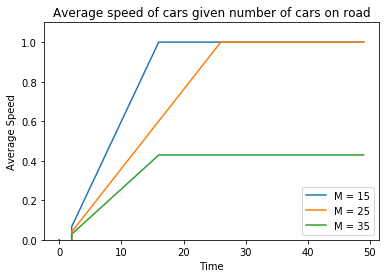

Time Taken to Steady Speed for M = 15 =>  16 
Time Taken to Steady Speed for M = 25 =>  26 
Time Taken to Steady Speed for M = 35 =>  16 


In [14]:
# Defines different variable M for given values of 15, 25, 35
M1 = 15
M2 = 25
M3 = 35
N = 50 # Set road capacity 
T = 50 # Set the time 

# Get the average speed and time taken to reach the average for the given M and N s
avg_speed_1, time_taken_1 = avg_vel(M = M1, N = N, T = T)
avg_speed_2, time_taken_2 = avg_vel(M = M2, N = N, T = T)
avg_speed_3, time_taken_3 = avg_vel(M = M3, N = N, T = T)

# Plotting average speed of cars with different values of M
t = list(range(T))

plt.plot(t, avg_speed_1)
plt.plot(t, avg_speed_2)
plt.plot(t, avg_speed_3)

plt.legend(['M = 15', 'M = 25', 'M = 35'], loc='lower right')
plt.title('Average speed of cars given number of cars on road')
plt.xlabel('Time')
plt.ylabel('Average Speed')
plt.ylim([0,1.1])

plt.show()

# Print the time taken to reach steady speed for given value of M
print('{:40s} {:3d} '.format('Time Taken to Steady Speed for M = 15 =>', time_taken_1))
print('{:40s} {:3d} '.format('Time Taken to Steady Speed for M = 25 =>', time_taken_2))
print('{:40s} {:3d} '.format('Time Taken to Steady Speed for M = 35 =>', time_taken_3))

**when M = 15, it is expected to reach max limit, as the road capacity is 50. This is the same for M = 25.
this is because every car need an empty cell in front to move. So as time goes, there will be an empty cell in front of each car.
however, when M=35, there is no way we can make an empty cell between all cars, so at each time, there are at least 15 cars waiting at each time step.**

**The largest value of $\textbf{M}$ to reach the meximum average is $\textbf{M = 25}$**

4) Does the average speed of the cars depend on their initial configuration? To answer this question, initally fill $M = 20$ cars in $N=50$ cells in three different ways:

a) Fill the first 20 cells with 20 cars.

b) Use `random.sample(range(0,N),M)` to randomly distribute the cars (you will need to import `random` to use this function).

c) Put them in pairs with one cell space between the pairs. That is, fill the cells 1,2,4,5,7,8,10,11,... 

Plot the average speed of the cars as a function of time up to $T=50$ for each case and discuss the results.


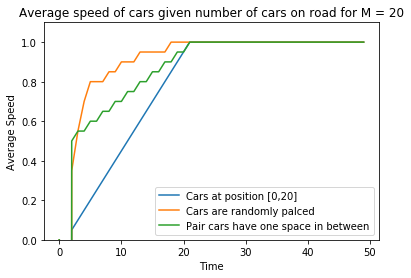

Time Taken to Steady Speed for cars at position [0,20]:                 21  
Time Taken to Steady Speed for cars are randomly palced:                18  
Time Taken to Steady Speed for pair cars have one space in between5:    21  


In [15]:
import random # Import random library 
# Set values of M,N and T
M = 20
N = 50
T = 50

# Create the index of car positions at time 0
initial_traffic_1 = (list(range(1,M+1))) # set cars at position [1,M]
initial_traffic_2 = (random.sample(range(1,N+1),M)) # place cars at random positions

# generate pair of cells with cell in between
counter = 0
initial_traffic_3 = []
for j in range(N):
    if (j+1) % 3 != 0 and counter < M:
        initial_traffic_3.append(j+1)
        counter += 1

# get average speed of cars in interval [0,T] and each step and time given to reach the steady average
avg_speed_1, time_taken_1 = avg_vel(M = M, N = N, T = T, cars = initial_traffic_1)
avg_speed_2, time_taken_2 = avg_vel(M = M, N = N, T = T, cars = initial_traffic_2)
avg_speed_3, time_taken_3 = avg_vel(M = M, N = N, T = T, cars = initial_traffic_3)

# Plot the average speed for different initial configurations
t = list(range(T))
plt.plot(t, avg_speed_1)
plt.plot(t, avg_speed_2)
plt.plot(t, avg_speed_3)

plt.legend(['Cars at position [0,20]', 'Cars are randomly palced', 'Pair cars have one space in between'], loc='best')
plt.title('Average speed of cars given number of cars on road for M = 20')
plt.xlabel('Time')
plt.ylabel('Average Speed')
plt.ylim([0,1.1])

plt.show()

# Print the time taken to reach the steady average speed for different initial configurations
print('{:70s} {:3d}  '.format('Time Taken to Steady Speed for cars at position [0,20]:', time_taken_1))
print('{:70s} {:3d}  '.format('Time Taken to Steady Speed for cars are randomly palced:', time_taken_2))
print('{:70s} {:3d}  '.format('Time Taken to Steady Speed for pair cars have one space in between5:', time_taken_3))

**We can see that in every configuration it reaches the maximum speed. Although the time taken to the max speed is different. The reason is that the road have capacity of having 20 cars and one empty cell in front of each car.**


5) Repeat the previous question for $M = 30$ cars. Does the average speed reach the same limit?

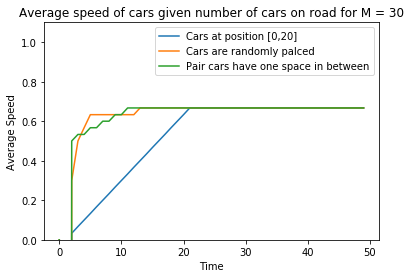

Time Taken to Steady Speed for cars at position [0,20]:                 21  
Time Taken to Steady Speed for cars are randomly palced:                13  
Time Taken to Steady Speed for pair cars have one space in between:     11  


In [16]:
# Set values of M,N and T
M = 30
N = 50
T = 50

# Create the index of car positions at time 0
initial_traffic_1 = list(range(1,M+1))
initial_traffic_2 = random.sample(range(1,N + 1),M)
# generate pair of cells with cell in between
counter = 0
initial_traffic_3 = []
for j in range(N):
    if (j+1) % 3 != 0 and counter < M:
        initial_traffic_3.append(j+1)
        counter += 1


# get average speed of cars in interval [0,T] and each step and time given to reach the steady average
avg_speed_1, time_taken_1 = avg_vel(M = M, N = N, T = T, cars = initial_traffic_1)
avg_speed_2, time_taken_2 = avg_vel(M = M, N = N, T = T, cars = initial_traffic_2)
avg_speed_3, time_taken_3 = avg_vel(M = M, N = N, T = T, cars = initial_traffic_3)

# Plot the average speed for different initial configurations 
t = list(range(T))
plt.plot(t, avg_speed_1)
plt.plot(t, avg_speed_2)
plt.plot(t, avg_speed_3)

plt.legend(['Cars at position [0,20]', 'Cars are randomly palced', 'Pair cars have one space in between'], loc='best')
plt.title('Average speed of cars given number of cars on road for M = 30')
plt.xlabel('Time')
plt.ylabel('Average Speed')
plt.ylim([0,1.1])

plt.show()

# Print the time taken to reach the steady average speed for different initial configurations
print('{:70s} {:3d}  '.format('Time Taken to Steady Speed for cars at position [0,20]:', time_taken_1))
print('{:70s} {:3d}  '.format('Time Taken to Steady Speed for cars are randomly palced:', time_taken_2))
print('{:70s} {:3d}  '.format('Time Taken to Steady Speed for pair cars have one space in between:', time_taken_3))

**We can see that the average speed did not reach the limit 1 when cars are places randomly or in a row. This is due to the road capacity. We have 30 cars and the road capacity is only 50. Each car need at least one empty cell to move. It is impossible to fit 30 cars in 50 cells with an empty cell in front of each car.**

6) How does the number of cars affect the final average speed? In other words, we want to see how traffic fluidity depends on how busy the road is. Use `scipy.stats.bernoulli.rvs(p, size=N) ` to fill each cell in the inital configuration (see workshop 5 if you are not familiar with this function). This means the chance of having a car in a cell is `p`.  Therefore, if `N` is large enough, you expect to have `N*p` cars on the road. Set $N=800$, vary `p` from $0.2$ to $0.8$, and plot the average speed of cars at `T=200` as a function of `p`. Comment on the results. How does the number of cars affect their final average speed?



In [17]:
from scipy.stats import bernoulli

In [18]:
p_vals = np.linspace(0.2, 0.8, num=100) # Create a list of p values between 0.2 and 0.8

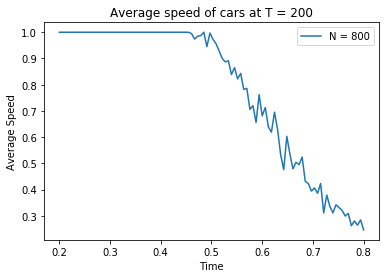

Final Average Speed (N=800):             0.246  


In [19]:
# Define different N with values of 800, 50 and 2000
T = 200
N = 800
# Create dictionary which will have p as keys and average speed as value
avg_N = {}
for p in p_vals:
    initial_traffic = bernoulli.rvs(p, size=N)
    avg_speed, _ = avg_vel(M = _, N = N, T = T, initial_traffic = initial_traffic)
    avg_N[p] = avg_speed[-1]
    
lists_N = sorted(avg_N.items()) # sorted by key, return a list of tuples
x, y = zip(*lists_N) # unpack a list of pairs into two tuples
plt.plot(x, y)


plt.legend(['N = 800'], loc='best')
plt.title('Average speed of cars at T = 200')
plt.xlabel('Time')
plt.ylabel('Average Speed')

plt.show()

# Print Final Average Speed
print('{:40s} {:3.3f}  '.format('Final Average Speed (N=800):', avg_speed[-1]))

7) Repeat the last question for $N=50$ and $N = 2000$. Do the results change? Why?

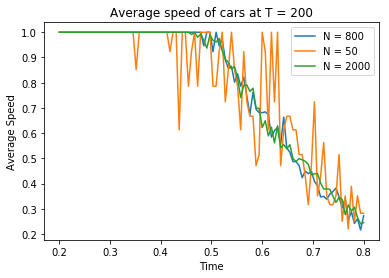

Final Average Speed (N=800):             0.272  
Final Average Speed (N=50):              0.282  
Final Average Speed (N=2000):            0.245  


In [20]:
# Define different N with values of 800, 50 and 2000
T = 200
N1 = 800
N2 = 50
N3 = 2000

# Create dictionary which will have p as keys and average speed as value
avg_N1 = {}
avg_N2 = {}
avg_N3 = {}

# Generate the average speed of different N and store them in dictionarie with key value p
for p in p_vals:
    initial_traffic_1 = bernoulli.rvs(p, size=N1)
    initial_traffic_2 = bernoulli.rvs(p, size=N2)
    initial_traffic_3 = bernoulli.rvs(p, size=N3)
    avg_speed_1, _ = avg_vel(M = _, N = N1, T = T, initial_traffic = initial_traffic_1)
    avg_speed_2, _ = avg_vel(M = _, N = N2, T = T, initial_traffic = initial_traffic_2)
    avg_speed_3, _ = avg_vel(M = _, N = N3, T = T, initial_traffic = initial_traffic_3)
    avg_N1[p] = avg_speed_1[-1]
    avg_N2[p] = avg_speed_2[-1]
    avg_N3[p] = avg_speed_3[-1]
    
lists_N1 = sorted(avg_N1.items()) # sorted by key, return a list of tuples
x1, y1 = zip(*lists_N1) # unpack a list of pairs into two tuples
plt.plot(x1, y1)

lists_N2 = sorted(avg_N2.items()) 
x2, y2 = zip(*lists_N2) 
plt.plot(x2, y2)

lists_N3 = sorted(avg_N3.items()) 
x3, y3 = zip(*lists_N3) 
plt.plot(x3, y3)

plt.legend(['N = 800', 'N = 50', 'N = 2000'], loc='best')
plt.title('Average speed of cars at T = 200')
plt.xlabel('Time')
plt.ylabel('Average Speed')

plt.show()

# Print Final Average Speed
print('{:40s} {:3.3f}  '.format('Final Average Speed (N=800):', avg_speed_1[-1]))
print('{:40s} {:3.3f}  '.format('Final Average Speed (N=50):', avg_speed_2[-1]))
print('{:40s} {:3.3f}  '.format('Final Average Speed (N=2000):', avg_speed_3[-1]))

*How does the number of cars affect their final average speed?*
**As roads get busier, the average speed of cars degreese for all value of N. We can see the decreasing trend starts at $p = 0.5$ which is expected, as there would be more cars on the road than the road capacity. In other words, when $p > 0.5 $ it would be possible to fit all cars with one empty cell in the road. Therefore, the average decrease as p increases.**

*Do the results change? Why?*
**The general trend in decreasing the average speed did not change for different N. However, For smaller N, the fluctuation in the final average speed is higher. This is because, as the road capacity decreases, the average becomes more sensative to initial positions of the cars. So as N increases, the average of cars is less sensative to initial positions of the car.**

---

### Task 2c - Fast and slow cars

Now imagine there are two types of cars on our road: fast cars who want to move with the speed of 2 cells per step if there are enough spaces in front of them, and the slow cars who always move with the speed of 1 cell per step as in the previous task. If there are less than two free cells in front of the fast cars, they either move one cell per step or don't move at all (like slow cars).

1) Numbering your cells from $1$ to $N=100$, put all fast cars initially in the prime indexed cells and the cells in the interval $(60,85]$. Now plot the position of the cars in the time interval $t=[0, 60]$. Do you think a part of road will stay congested forever? In which direction is the congested part of the traffic flow moving?

(You will find it helpful to construct a new function to help **`new_position2(r,Traj,Vel)`**, where the new vector `Vel` stores the velocity of each car).

In [21]:
def new_position2(r, Traj, Vel):
    """Function returns trajectory at next step having cars with different speed.
    Keyword arguments:
    r -> Current car positions
    Traj -> Current trajectory vector
    Vel -> Vector contaning speed of each car"""
    
    N = len(r) 
    
    shifted_r = np.roll(r,-1, axis=0) # Get the availability of next front cells 
    shifted_r_by_2 = np.roll(r, -2, axis=0) # Get availablility of cells two step ahead
    allowed_2_moves = r * (1 - shifted_r) * (1 - shifted_r_by_2) # Get the cells that are allowed to move two cells
    allowed_1_move = r * (1 - shifted_r) # Get the cells that are allowed to move one cell ahead
    
    new_traj = []
    for idx, car in enumerate(Traj):
        # Check if the car is fast
        if Vel[idx] == 2:
            # Check if it is allowed to move two cells, 1 cells or no movement
            if allowed_2_moves[(car % N)-1] == 1:
                new_traj.append(car + 2 )
            elif allowed_1_move[(car % N)-1] == 1:
                new_traj.append(car + 1)
            else:
                new_traj.append(car)
                
        # Check whether the car is slow        
        elif Vel[idx] == 1:
            # Check wether it is allowed to move ahead or has to stay 
            if allowed_1_move[(car % N)-1] == 1:
                new_traj.append(car + 1)
            else:
                new_traj.append(car)
            
    return np.array(new_traj)


Text(0, 0.5, 'Time')

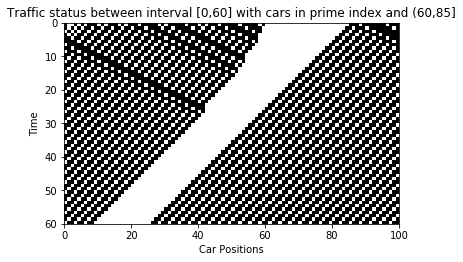

In [22]:
def build_traj2(r0, upper_t, Vel):
    """Function return R matrix and Trajectory Matrix.
    Keyword arguments:
    r0 -> Initial configuration
    upper_t -> The upper bound for time interval
    Vel -> speed of the cars"""
    N = len(r0)
    R = np.array([r0]).T
    
    # Initilise the trajectory with the initial trajectory value 
    Traj = (np.array([np.where(r0 == 1)[0] + 1])).T
    
    # For loop to add new trajectory into Traj matrix
    for t in range(upper_t-1):
        # Get new trajecotry by calling new_position2 function
        traj = np.array([new_position2(R[:,t], Traj[:,t], Vel)]).T
        # Stack them horizontally to get MxT matrix
        Traj = np.hstack([Traj, traj])
        
        # Get new value of R 
        updated_r = np.array([new_updateR(Traj[:,t+1], N)]).T
        # Stack them horizontally to get NxT matrix
        R = np.hstack([R, updated_r])
    return R, Traj

N = 100 # Set road capacity
fast_cars = list(set(find_primes(1,N) + list(range(61,86)))) # Included fast cars at (60,85]
Vel = np.full(len(fast_cars), 2)
slow_cars = [] # index of slow cars
for sc in slow_cars:
    Vel[sc] = 1

r = np.zeros(N)
for i in range(N):
    if i+1 in fast_cars:
        r[i] = 1
        
traj = np.where(r == 1)[0] + 1

# Plot traffic within [0,60]
R, _ = build_traj2(r, 60, Vel)
plt.imshow(R.T, cmap=cm.gray, extent=[0,100,60,0])
plt.title("Traffic status between interval [0,60] with cars in prime index and (60,85]")
plt.xlabel('Car Positions')
plt.ylabel('Time')

*Do you think a part of road will stay congested forever? In which direction is the congested part of the traffic flow moving?*
**The part of the road that was filled with car with no space (65,85] is congested. The congestion seems to go forever. The reason is that cell number 59 is filled with a car initially and there is only one cell empty until cell numbers (60,85], so at each step, one car at the end of the congested part moves forward, but one car is added from behind. That is why we can see that the congested area moves to the left (to lower cell number)**

*2) Now put fast cars initially in the prime indexed cells only like those in the last question, but this time make the last car (in cell 97) slow (i.e. moving only one cell per step). How does this car affect the whole traffic flow?*
**The slow car cause the traffic flow with speed of 1 after some time. This is because, after some time, all cars are placed behind the slow car, hence they can't move fatster than 1 move per time step.**

Text(0, 0.5, 'Time')

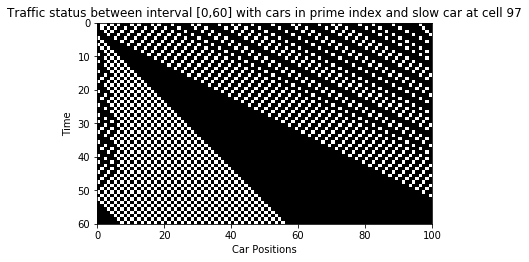

In [23]:
N = 100
fast_cars = list(set(find_primes(1,N))) # Included fast cars at (60,85]
Vel = np.full(len(fast_cars), 2)
slow_cars = [97] # index of slow cars
for sc in slow_cars:
    index = fast_cars.index(sc)
    Vel[index] = 1

r = np.zeros(N)
for i in range(N):
    if i+1 in fast_cars:
        r[i] = 1
        
traj = np.where(r == 1)[0] + 1
    
new_traj = new_position2(r,traj,Vel)
new_updateR(new_traj, N)

# Plot traffic within [0,60] having a slow car
R, _ = build_traj2(r, 60, Vel)
plt.imshow(R.T, cmap=cm.gray, extent=[0,100,60,0])
plt.title("Traffic status between interval [0,60] with cars in prime index and slow car at cell 97")
plt.xlabel('Car Positions')
plt.ylabel('Time')

3) By running the simulation up to $T = 100$, calculate the average velocity of the cars at this final time.

In [24]:
_, Traj = build_traj2(r, 100, Vel) # Get Trajectory matrix
avg_velocity = ave_vel(Traj, 100) # get the average at time T = 100
print('{:45s} {:3.2f}  '.format('average velocity of the cars at T = 100: ', avg_velocity))

average velocity of the cars at T = 100:      1.00  
